# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )


Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

df.describe()


(297, 10)
    ca  thal
0  0.0   6.0
1  3.0   3.0
2  2.0   7.0
3  0.0   3.0
4  0.0   3.0
Datset after deleting rows where ca (number of major blood vessels coloured by fluorscopy) and type of 'thal' (thalessaemia) is unknown      sex   age  trestbps   chol  fbs  restecg  thalach  exang   ca  thal
0    1.0  63.0     145.0  233.0  1.0      2.0    150.0    0.0  0.0   6.0
1    1.0  67.0     160.0  286.0  0.0      2.0    108.0    1.0  3.0   3.0
2    1.0  67.0     120.0  229.0  0.0      2.0    129.0    1.0  2.0   7.0
3    1.0  37.0     130.0  250.0  0.0      0.0    187.0    0.0  0.0   3.0
4    0.0  41.0     130.0  204.0  0.0      2.0    172.0    0.0  0.0   3.0
..   ...   ...       ...    ...  ...      ...      ...    ...  ...   ...
297  0.0  57.0     140.0  241.0  0.0      0.0    123.0    1.0  0.0   7.0
298  1.0  45.0     110.0  264.0  0.0      0.0    132.0    0.0  0.0   7.0
299  1.0  68.0     144.0  193.0  1.0      0.0    141.0    0.0  2.0   7.0
300  1.0  57.0     130.0  131.0  0.0      0.0 

,sex,age,blood pressure,cholesterol,Fasting Blood Sugar,restecg,thalach,exercise induced angina,severity of artery blockage,blood defect type
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.676768,54.542088,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,-0.676768,4.730640
std,0.468500,9.049736,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,0.938965,1.938629
min,0.000000,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-3.000000,3.000000
25%,0.000000,48.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,-1.000000,3.000000
50%,1.000000,56.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.000000,3.000000
75%,1.000000,61.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,0.000000,7.000000
max,1.000000,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,-0.000000,7.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    
    if print_output:
        print("Standard Deviation   = ", y0)
        print("Minimum              = ", y1)
        print("Maximum              = ", y2)
        print("Range                = ", y3)
        print("25th percentile      = ", y4)
        print("75th percentile      = ", y5)
        print("Inter-quartile Range = ", y6)
    
    return y0, y1, y2, y3, y4, y5, y6

- central tendency: avg/mean, median, mode
- dispersion: how far spread apart; st dev, min, max, range, quarter percentiles,
-  

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
df_numerical = df.drop(['age group', 'blood defect type'], axis=1)

print(df_numerical.describe())

def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df_numerical.apply(lambda x: central(x), axis=0)
    round_dict = {'sex': 2, 'age': 1, 'blood pressure': 2, 'cholesterol': 2, 'restecg':2, 'thalach': 2, 'exercise induced angina': 2, 'severity of artery blockage': 2}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table()

              sex         age  blood pressure  cholesterol  \
count  297.000000  297.000000      297.000000   297.000000   
mean     0.676768   54.542088      131.693603   247.350168   
std      0.468500    9.049736       17.762806    51.997583   
min      0.000000   29.000000       94.000000   126.000000   
25%      0.000000   48.000000      120.000000   211.000000   
50%      1.000000   56.000000      130.000000   243.000000   
75%      1.000000   61.000000      140.000000   276.000000   
max      1.000000   77.000000      200.000000   564.000000   

       Fasting Blood Sugar     restecg     thalach  exercise induced angina  \
count           297.000000  297.000000  297.000000               297.000000   
mean              0.144781    0.996633  149.599327                 0.326599   
std               0.352474    0.994914   22.941562                 0.469761   
min               0.000000    0.000000   71.000000                 0.000000   
25%               0.000000    0.000000  133.00

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,sex,age,blood pressure,cholesterol,Fasting Blood Sugar,restecg,thalach,exercise induced angina,severity of artery blockage
mean,0.68,54.5,131.69,247.35,0.144781,1.0,149.6,0.33,-0.68
median,1.00,56.0,130.00,243.00,0.000000,1.0,153.0,0.00,0.00
mode,1.00,58.0,120.00,197.00,0.000000,0.0,162.0,0.00,-0.00


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict = {'sex': 2, 'age': 1, 'blood pressure': 2, 'cholesterol': 2, 'restecg':2, 'thalach': 2, 'exercise induced angina': 2, 'severity of artery blockage': 2}
    df_dispersion         = df_numerical.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

Standard Deviation   =  0.4677105819309183
Minimum              =  0.0
Maximum              =  1.0
Range                =  1.0
25th percentile      =  0.0
75th percentile      =  1.0
Inter-quartile Range =  1.0
Standard Deviation   =  9.03448758992664
Minimum              =  29.0
Maximum              =  77.0
Range                =  48.0
25th percentile      =  48.0
75th percentile      =  61.0
Inter-quartile Range =  13.0
Standard Deviation   =  17.732877438234716
Minimum              =  94.0
Maximum              =  200.0
Range                =  106.0
25th percentile      =  120.0
75th percentile      =  140.0
Inter-quartile Range =  20.0
Standard Deviation   =  51.9099707078921
Minimum              =  126.0
Maximum              =  564.0
Range                =  438.0
25th percentile      =  211.0
75th percentile      =  276.0
Inter-quartile Range =  65.0
Standard Deviation   =  0.3518800433343816
Minimum              =  0.0
Maximum              =  1.0
Range                =  1.0
25th p

,sex,age,blood pressure,cholesterol,Fasting Blood Sugar,restecg,thalach,exercise induced angina,severity of artery blockage
st.dev.,0.47,9.0,17.73,51.91,0.35188,0.99,22.9,0.47,0.94
min,0.00,29.0,94.00,126.00,0.00000,0.00,71.0,0.00,-3.00
max,1.00,77.0,200.00,564.00,1.00000,2.00,202.0,1.00,-0.00
range,1.00,48.0,106.00,438.00,1.00000,2.00,131.0,1.00,3.00
25th,0.00,48.0,120.00,211.00,0.00000,0.00,133.0,0.00,-1.00
75th,1.00,61.0,140.00,276.00,0.00000,2.00,166.0,1.00,0.00
IQR,1.00,13.0,20.00,65.00,0.00000,2.00,33.0,1.00,1.00


Let's save the variables in easier-to-use variable names:

In [6]:
bp    = df['blood pressure']
chol = df['cholesterol']
ang = df['exercise induced angina']
sev = df['severity of artery blockage']
ecg = df['restecg']
maxhr = df['thalach']
fbs = df['Fasting Blood Sugar']

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

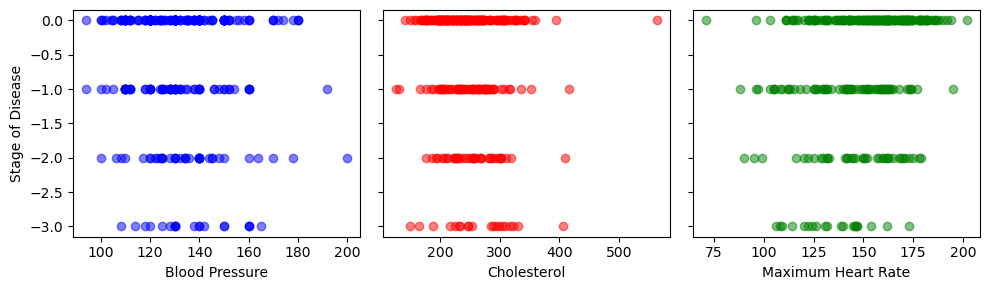

In [7]:
fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
axs[0].scatter( bp, sev, alpha=0.5, color='b' )
axs[1].scatter( chol, sev, alpha=0.5, color='r' )
axs[2].scatter( maxhr, sev, alpha=0.5, color='g' )

xlabels = 'Blood Pressure', 'Cholesterol', 'Maximum Heart Rate' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Stage of Disease')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [8]:
def corrcoeff(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    if np.std(x) == 0 or np.std(y) == 0:
        return np.nan
    return np.corrcoef(x, y)[0, 1]

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


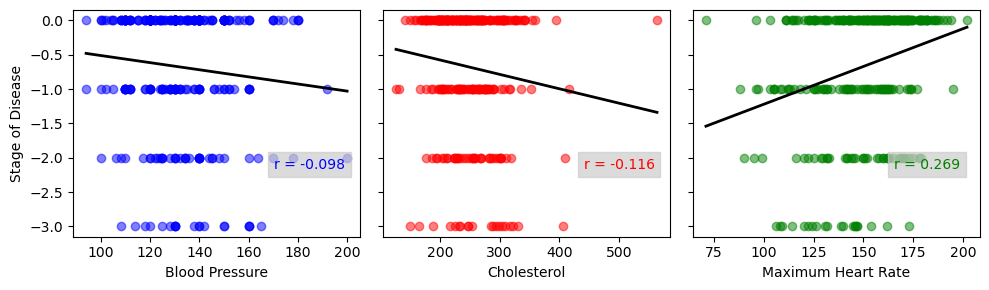

In [9]:
    
fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
ivs     = [bp, chol, maxhr]
colors  = 'b', 'r', 'g'
for ax,x,c in zip(axs, ivs, colors):
    ax.scatter( x, sev, alpha=0.5, color=c )
    plot_regression_line(ax, x, sev, color='k', ls='-', lw=2)
    r   = corrcoeff(x, sev)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = 'Blood Pressure', 'Cholesterol', 'Maximum Heart Rate' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Stage of Disease')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The correlation coefficients are all relatively low, suggesting no clear linear correlation between the DV and IVs.

However, in the sugar data (right panel above) it appears that there may be opposite trends for low-quality wines (quality <= 5) and high-quality wines (quality > 5).  Let's plot quality vs. sugar separately for the low- and high-quality groups, along with linear regression trends.

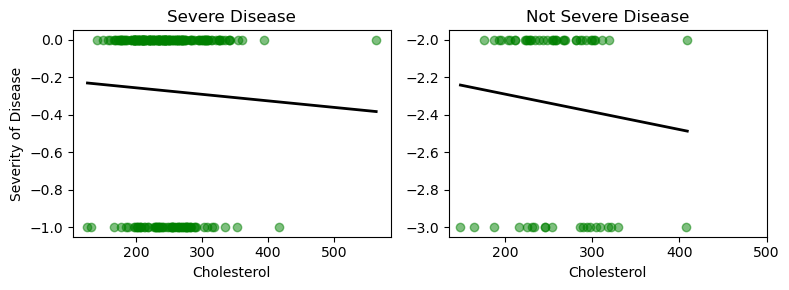

In [10]:

i_high   = sev > -2
i_low    = sev <= -2

fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
i = [chol]
for ax,i in zip(axs, [i_high, i_low]):
    ax.scatter( chol[i], sev[i], alpha=0.5, color='g' )
    plot_regression_line(ax, chol[i], sev[i], color='k', ls='-', lw=2)
[ax.set_xlabel('Cholesterol')  for ax in axs] 
axs[0].set_title('Severe Disease')
axs[0].set_ylabel('Severity of Disease')
axs[1].set_title('Not Severe Disease')
axs[1].set_xticks([200, 300, 400, 500])
plt.show()

The linear trend seems to be similar for both high and low severity. 

In [11]:
def plot_cholesterol():
    
    fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
    for ax,i in zip(axs, [i_high, i_low]):
        ax.scatter( chol[i], sev[i], alpha=0.5, color='g' )
        plot_regression_line(ax, chol[i], sev[i], color='k', ls='-', lw=2)
    [axs[0].plot(chol[i_high].mean(), q, 'ro')  for q in [0]]
    [axs[1].plot(chol[i_low].mean(), q, 'ro')  for q in [-1, -2, -3]]
    [ax.set_xlabel('Cholesterol')  for ax in axs] 
    axs[0].set_title('High Severity')
    axs[0].set_ylabel('Severity of Disease')
    axs[1].set_title('Low Severity')
    axs[1].set_xticks([200, 300, 400, 500])
    plt.show()


These analyses show that the trends associated with just the means are unclear.

Let's now assemble all results into a single figure for reporting purposes:

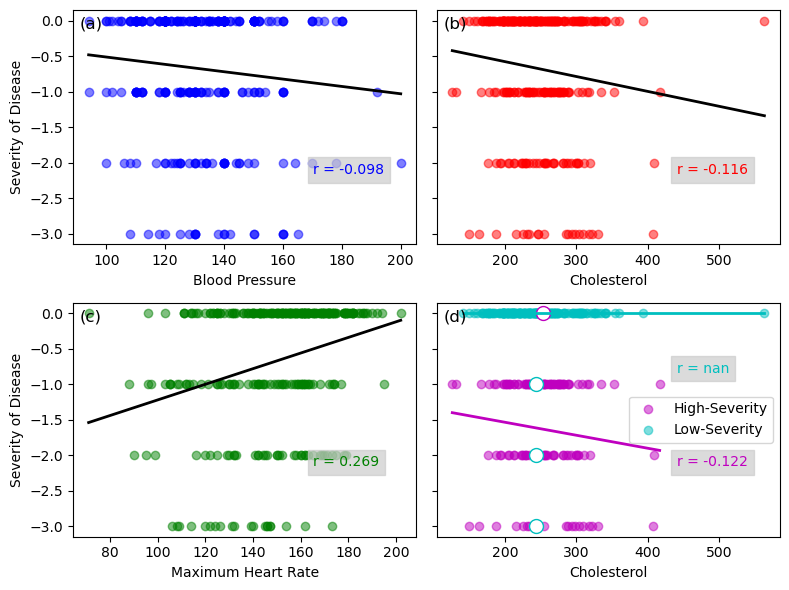

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [12]:
def plot_descriptive():
    
    fig,axs = plt.subplots( 2, 2, figsize=(8,6), tight_layout=True )
    ivs     = [bp, chol, maxhr]
    colors  = 'b', 'r', 'g'
    for ax,x,c in zip(axs.ravel(), ivs, colors):
        ax.scatter( x, sev, alpha=0.5, color=c )
        plot_regression_line(ax, x, sev, color='k', ls='-', lw=2)
        r   = corrcoeff(x, sev)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = 'Blood Pressure', 'Cholesterol', 'Maximum Heart Rate' 
    [ax.set_xlabel(s) for ax,s in zip(axs.ravel(),xlabels)]
    [ax.set_ylabel('Severity of Disease') for ax in axs[:,0]]
    [ax.set_yticklabels([])  for ax in axs[:,1]]


    ax       = axs[1,1]
    i_high    = sev > -1
    i_low   = sev <= -1
    fcolors  = 'm', 'c'
    labels   = 'High-Severity', 'Low-Severity'
    q_groups = [[0], [-1, -2, -3]]
    ylocs    = 0.3, 0.7
    for i,c,s,qs,yloc in zip([i_low, i_high], fcolors, labels, q_groups, ylocs):
        ax.scatter( chol[i], sev[i], alpha=0.5, color=c, facecolor=c, label=s )
        plot_regression_line(ax, chol[i], sev[i], color=c, ls='-', lw=2)
        [ax.plot(chol[i].mean(), q, 'o', color=c, mfc='w', ms=10)  for q in qs]
        r   = corrcoeff(chol[i], sev[i])
        ax.text(0.7, yloc, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    ax.legend()
    ax.set_xlabel('Cholesterol')

    panel_labels = 'a', 'b', 'c', 'd'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes)  for ax,s in zip(axs.ravel(), panel_labels)]
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()

**Question:** What is the most common age group affected by Coronary Artery Disease?

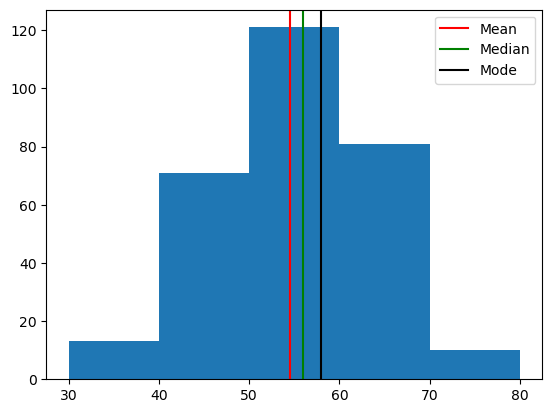

<p><span style="font-size: 1.2em;"><b>Figure 2</b>: Distribution of Age</span></p><br><br>

In [13]:
def plot_agedistribution():
    x        = df['age']
    x0,x1,x2 = central(x)
    
    custom_bins = [ 30, 40, 50, 60, 70, 80 ]
    
    plt.figure()
    plt.hist( x, bins=custom_bins)
    plt.axvline(x0, color='r', label='Mean')
    plt.axvline(x1, color='g', label='Median')
    plt.axvline(x2, color='k', label='Mode')
    axs[1].set_xticks([30, 40, 50, 60, 70])
    plt.legend()
    plt.show()

    display_title('Distribution of Age', pref='Figure', num=2)

plot_agedistribution()

**Answer:** The most common age group is 50-59 years old, with the mean and median around 55 years old. As the mean and median are quite similar, and the data is normally distributed - it can also be seen as the average age and a good representation of the central tendency. 

**Question:** Is coronary artery disease more common in females or males?

In [14]:
n_female = (df['sex']==0).sum()
n_male    = (df['sex']==1).sum()

print('Female Patients', n_female)
print('Male Patients', n_male)

Female Patients 96
Male Patients 201


This shows that out of a sample of around 300 cases, 2/3s of the patients were male - suggesting a higher prevalence in men. 
Answer: It is more common in males. 

**Question:** Is there stronger correlation between blood pressure and cholesterol levels or blood pressure and blood sugar levels. 

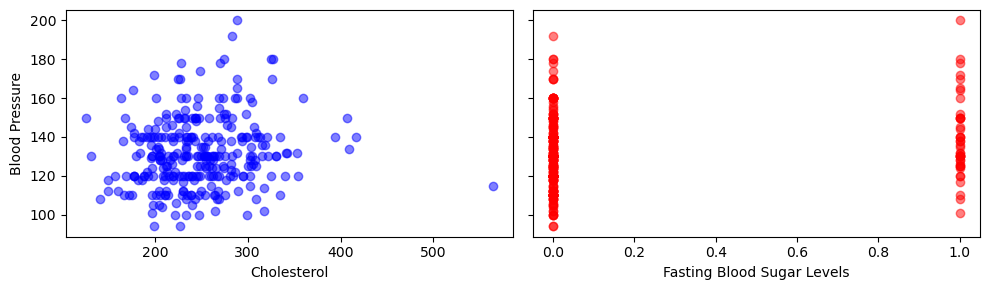

In [15]:
fig,axs = plt.subplots( 1, 2, figsize=(10,3), tight_layout=True )
axs[0].scatter( chol, bp, alpha=0.5, color='b' )
axs[1].scatter( fbs, bp, alpha=0.5, color='r' )


xlabels = 'Cholesterol', 'Fasting Blood Sugar Levels'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Blood Pressure')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

**Question:** What is the distribution of blood pressure

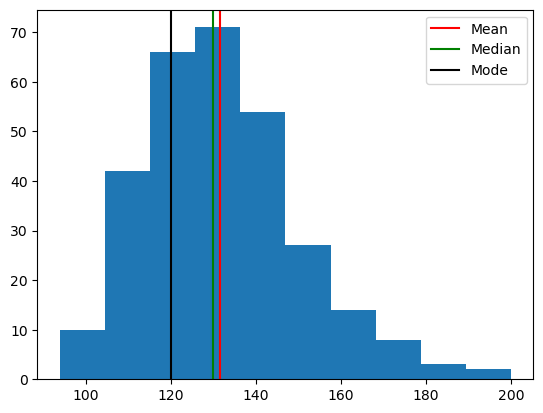

In [16]:
x        = df['blood pressure']
x0,x1,x2 = central(x)

plt.figure()
plt.hist( x )
plt.axvline(x0, color='r', label='Mean')
plt.axvline(x1, color='g', label='Median')
plt.axvline(x2, color='k', label='Mode')
plt.legend()
plt.show()

**Answer:** Blood pressure is slightly positively skewed, suggesting that lower blood pressures are associated with coronary artery diseases. 

In [17]:
age0   = df['age'][df['sex']==0]
age1   = df['age'][df['sex']==1]

print( f'Average age (st.dev) of female patients: {age0.mean():.1f} ({age0.std():.1f})'  )
print( f'Average age (st.dev) of male patients:    {age1.mean():.1f} ({age1.std():.1f})'  )

Average age (st.dev) of female patients: 55.8 (9.4)
Average age (st.dev) of male patients:    54.0 (8.8)


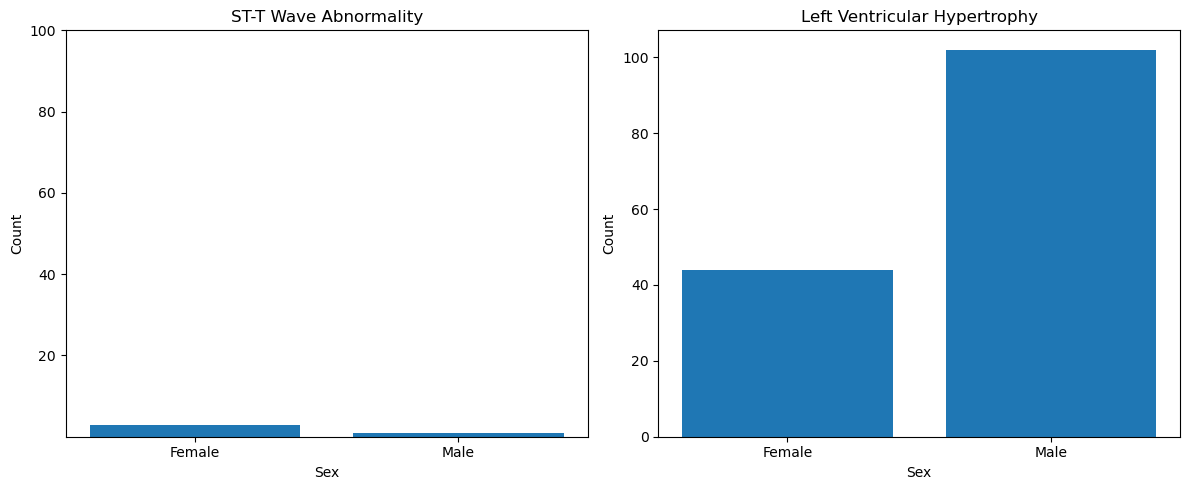

<p><span style="font-size: 1.2em;"><b>Figure 3</b>: Heart Activity Abnormality in Female vs Male Patients</span></p><br><br>

In [18]:
def plot_ecg():
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sex_labels = {0: 'Female', 1: 'Male'}

    counts1 = df[df['restecg'] == 1]['sex'].value_counts().sort_index()
    axes[0].bar([sex_labels[i] for i in counts1.index], counts1.values)
    axes[0].set_xlabel('Sex')
    axes[0].set_ylabel('Count')
    axes[0].set_title('ST-T Wave Abnormality')
    axes[0].set_yticks([20, 40, 60, 80, 100])

    counts2 = df[df['restecg'] == 2]['sex'].value_counts().sort_index()
    axes[1].bar([sex_labels[i] for i in counts2.index], counts2.values)
    axes[1].set_xlabel('Sex')
    axes[1].set_ylabel('Count')
    axes[1].set_title('Left Ventricular Hypertrophy')

    plt.tight_layout()
    plt.show()

    display_title('Heart Activity Abnormality in Female vs Male Patients', pref='Figure', num=3)
    
plot_ecg()